## EDA Assignment 1

Importing libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data from the CSV file

In [59]:
data = pd.read_csv("./listings.csv")
print(data)

                      id                                      listing_url  \
0               50489368            https://www.airbnb.com/rooms/50489368   
1               53687935            https://www.airbnb.com/rooms/53687935   
2     623833252305593889  https://www.airbnb.com/rooms/623833252305593889   
3               53817024            https://www.airbnb.com/rooms/53817024   
4               54381390            https://www.airbnb.com/rooms/54381390   
...                  ...                                              ...   
7802             1018426             https://www.airbnb.com/rooms/1018426   
7803             1059961             https://www.airbnb.com/rooms/1059961   
7804            27558226            https://www.airbnb.com/rooms/27558226   
7805  619605575248018100  https://www.airbnb.com/rooms/619605575248018100   
7806             5242394             https://www.airbnb.com/rooms/5242394   

           scrape_id last_scraped           source  \
0     20240904163718 

Data cleaning \
Remove duplicates based on 'id' column \
Handle missing values (Fill missing 'price' with median since it's less affected by outliers) 

In [60]:
data.drop_duplicates(subset='id', inplace=True)
data.loc[:, 'price'] = data['price'].replace(r'[\$,]', '', regex=True).astype(float)
data.loc[:, 'price'] = data['price'].fillna(data['price'].median())
cleaned_file_path = 'cleaned_listings.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Data cleaning complete. Cleaned data saved to {cleaned_file_path}.")

C:\Users\Lawry\AppData\Local\Temp\ipykernel_6500\1812501432.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.loc[:, 'price'] = data['price'].fillna(data['price'].median())


Data cleaning complete. Cleaned data saved to cleaned_listings.csv.


Load the data from the cleaned CSV file

In [61]:
data = pd.read_csv("./cleaned_listings.csv")

Calculate summary statistics for selected numerical features

In [62]:
summary_stats = data[['price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating']].describe()
print(summary_stats)

              price  minimum_nights  maximum_nights  number_of_reviews  \
count   7807.000000     7807.000000     7807.000000        7807.000000   
mean     220.726143       20.695017      521.968106          50.334187   
std      888.940984       48.701853    11322.322247         106.163371   
min       25.000000        1.000000        1.000000           0.000000   
25%      113.000000        2.000000       30.000000           1.000000   
50%      150.000000        3.000000      360.000000           7.000000   
75%      210.000000       30.000000      365.000000          46.000000   
max    50000.000000     1125.000000   999999.000000        1239.000000   

       review_scores_rating  
count           6036.000000  
mean               4.787391  
std                0.400233  
min                1.000000  
25%                4.750000  
50%                4.910000  
75%                5.000000  
max                5.000000  


Count: Number of non-null entries. \
Mean: Average value. \
Standard Deviation (std): Measure of data dispersion. \
Minimum (min) and Maximum (max) values. \
25th, 50th (median), and 75th Percentiles: Values below which a certain percentage of data falls. 

In [63]:
features = ['price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating']

for feature in features:
    mean_value = data[feature].mean()
    median_value = data[feature].median()
    mode_value = data[feature].mode()[0]

    print(f"{feature.capitalize()} Statistics:")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Mode: {mode_value}\n")

Price Statistics:
Mean: 220.7261432048162
Median: 150.0
Mode: 150.0

Minimum_nights Statistics:
Mean: 20.69501729217369
Median: 3.0
Mode: 30

Maximum_nights Statistics:
Mean: 521.9681055463046
Median: 360.0
Mode: 365

Number_of_reviews Statistics:
Mean: 50.334187267836555
Median: 7.0
Mode: 0

Review_scores_rating Statistics:
Mean: 4.787390656063618
Median: 4.91
Mode: 5.0



Plot histograms

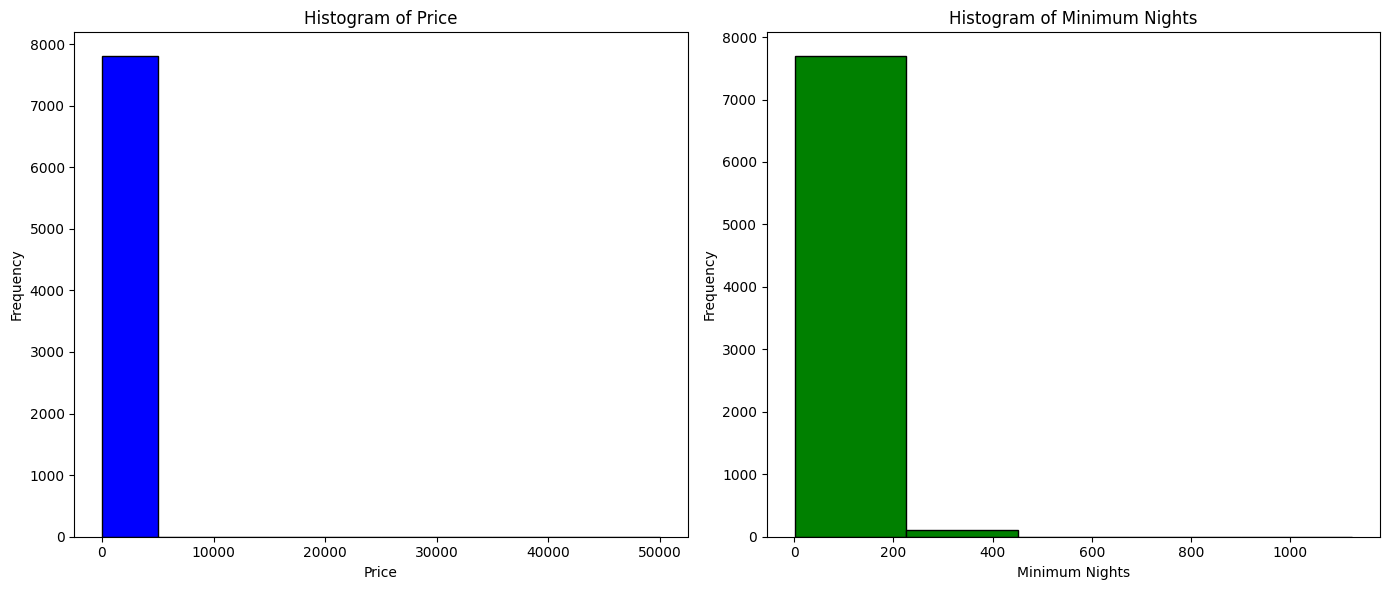

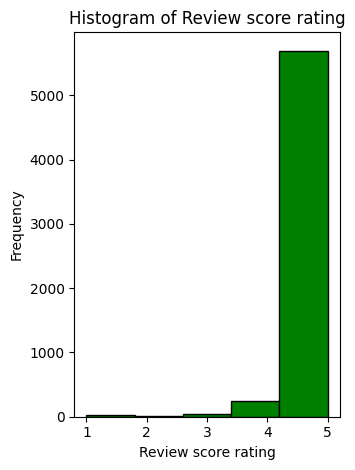

In [64]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data['price'].dropna(), bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['minimum_nights'].dropna(), bins=5, color='green', edgecolor='black')
plt.title('Histogram of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()   

plt.subplot(1, 2, 2)
plt.hist(data['review_scores_rating'].dropna(), bins=5, color='green', edgecolor='black')
plt.title('Histogram of Review score rating')
plt.xlabel('Review score rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show() 

Log transform 'price' and 'minimum_nights' to reduce skewness\
Plot transformed density plots\
Remove extreme outliers before plotting\
Define bounds for outliers\
Filter out outliers\
Plot filtered histograms

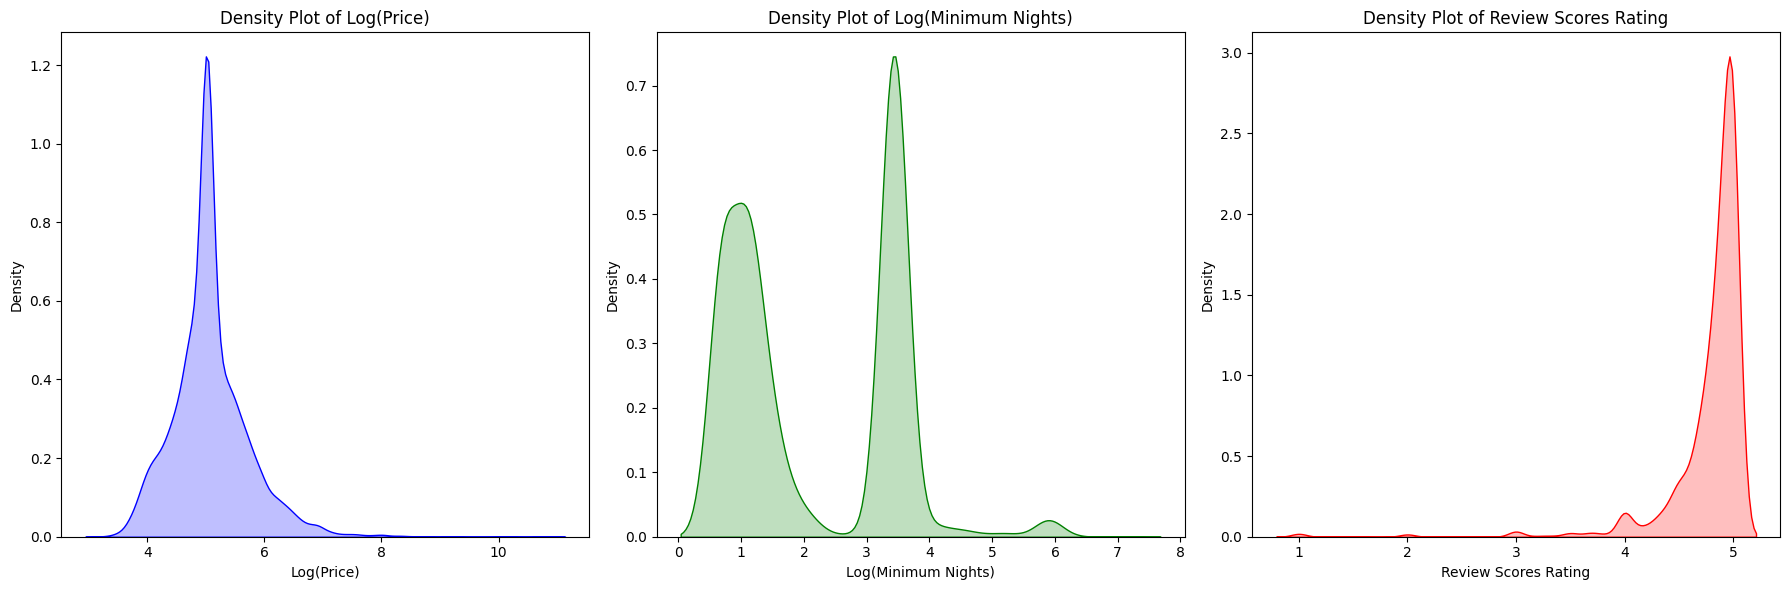

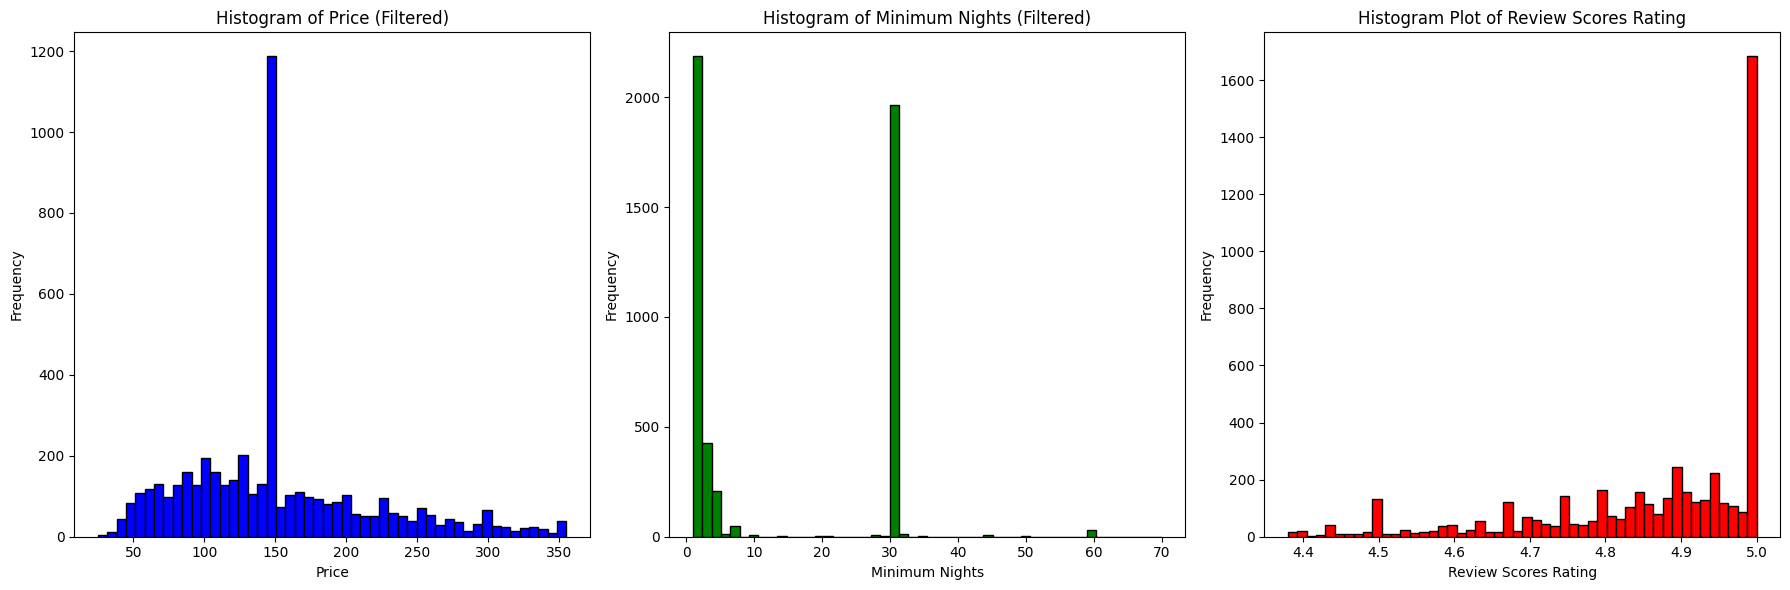

In [65]:
data['log_price'] = np.log1p(data['price'])
data['log_minimum_nights'] = np.log1p(data['minimum_nights'])

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.kdeplot(data['log_price'].dropna(), color='blue', fill=True)
plt.title('Density Plot of Log(Price)')
plt.xlabel('Log(Price)')
plt.ylabel('Density')

plt.subplot(1, 3, 2)
sns.kdeplot(data['log_minimum_nights'].dropna(), color='green', fill=True)
plt.title('Density Plot of Log(Minimum Nights)')
plt.xlabel('Log(Minimum Nights)')
plt.ylabel('Density')

plt.subplot(1, 3, 3)
sns.kdeplot(data['review_scores_rating'].dropna(), color='red', fill=True)
plt.title('Density Plot of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Density')


plt.tight_layout()
plt.show()

Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_nights = data['minimum_nights'].quantile(0.25)
Q3_nights = data['minimum_nights'].quantile(0.75)
IQR_nights = Q3_nights - Q1_nights

Q1_rating = data['review_scores_rating'].quantile(0.25)
Q3_rating = data['review_scores_rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating

lower_bound_rating = Q1_rating - 1.5 * IQR_rating
upper_bound_rating = Q3_rating + 1.5 * IQR_rating

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

lower_bound_nights = Q1_nights - 1.5 * IQR_nights
upper_bound_nights = Q3_nights + 1.5 * IQR_nights

filtered_data = data[(data['price'] >= lower_bound_price) & (data['price'] <= upper_bound_price)]
filtered_data = filtered_data[(filtered_data['minimum_nights'] >= lower_bound_nights) & (filtered_data['minimum_nights'] <= upper_bound_nights)]
filtered_data = filtered_data[(filtered_data['review_scores_rating'] >= lower_bound_rating) & (filtered_data['review_scores_rating'] <= upper_bound_rating)]

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(filtered_data['price'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Price (Filtered)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(filtered_data['minimum_nights'], bins=50, color='green', edgecolor='black')
plt.title('Histogram of Minimum Nights (Filtered)')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(filtered_data['review_scores_rating'], bins=50, color='red', edgecolor='black')
plt.title('Histogram Plot of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Select relevant numerical features\
Calculate the correlation matrix\
Plot the correlation matrix

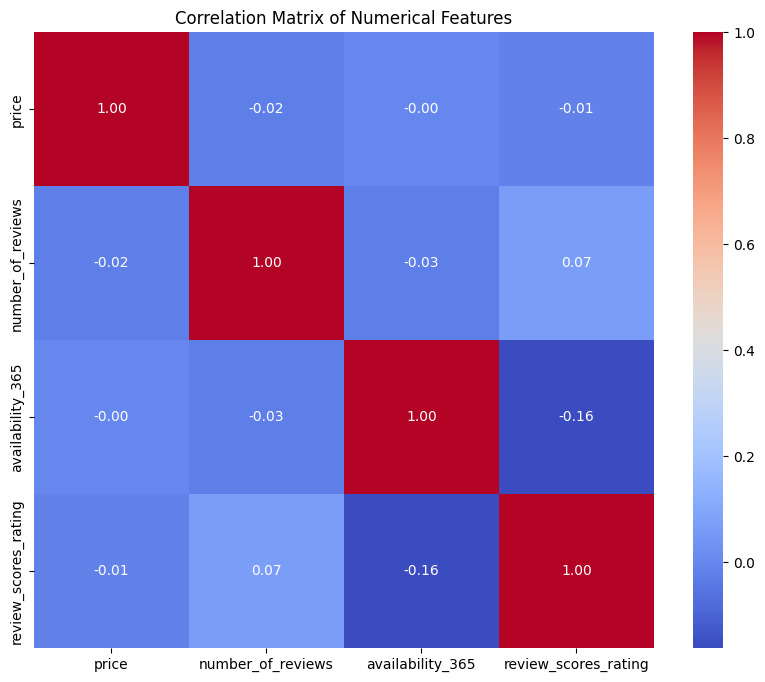

In [66]:
numerical_features = ['price', 'number_of_reviews', 'availability_365', 'review_scores_rating']
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Group by neighborhood and calculate average price\
Plot average price by neighborhood\
Group by room type and calculate average price\
Plot average price by room type\
Analyze distribution of stays (short-term vs long-term)\
Plot distribution of stay types

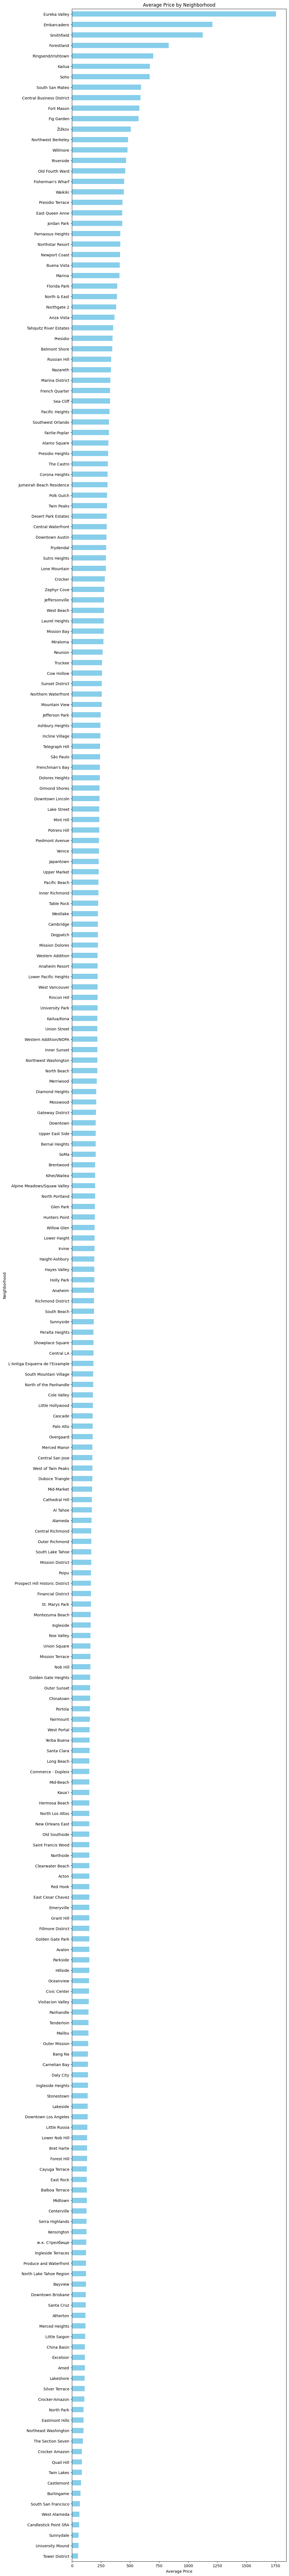

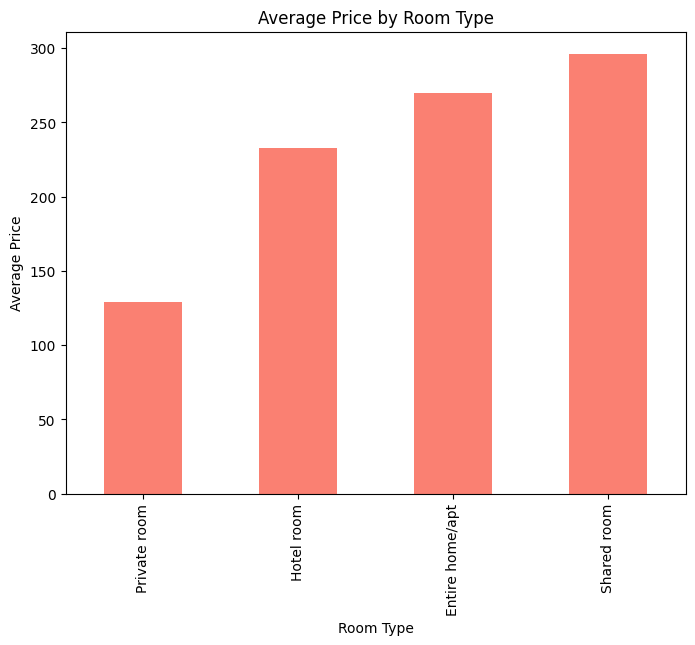

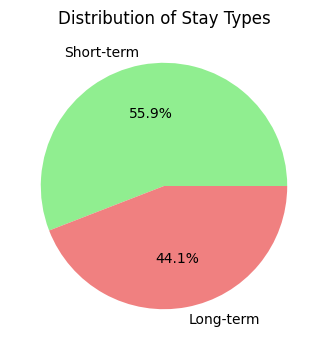

In [67]:
neighborhood_price = data.groupby('host_neighbourhood')['price'].mean().sort_values()

plt.figure(figsize=(10, 120))
neighborhood_price.plot(kind='barh', color='skyblue')
plt.title('Average Price by Neighborhood')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()

room_type_price = data.groupby('room_type')['price'].mean().sort_values()

plt.figure(figsize=(8, 6))
room_type_price.plot(kind='bar', color='salmon')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

data['stay_type'] = data['minimum_nights'].apply(lambda x: 'Short-term' if x < 30 else 'Long-term')

stay_distribution = data['stay_type'].value_counts()

plt.figure(figsize=(6, 4))
stay_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Stay Types')
plt.ylabel('')
plt.show()

Group by neighborhood and calculate average review score\
Plot average review scores by neighborhood

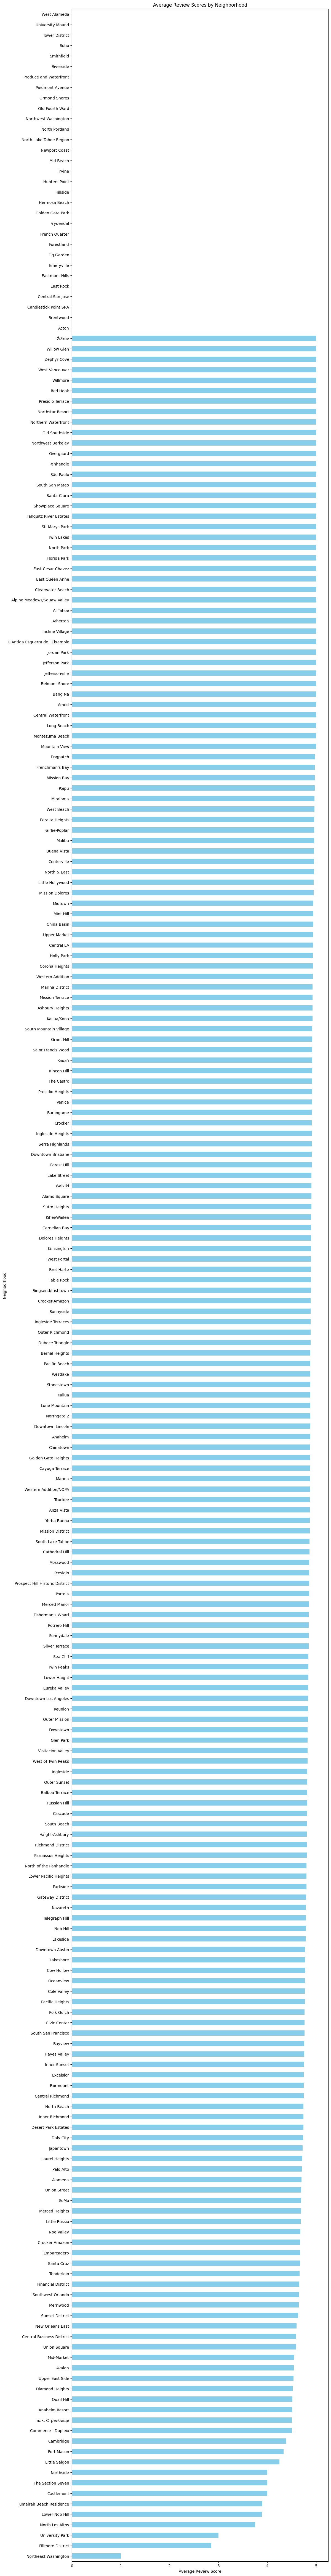

In [68]:
neighborhood_ratings = data.groupby('host_neighbourhood')['review_scores_rating'].mean().sort_values()

plt.figure(figsize=(12, 120))
neighborhood_ratings.plot(kind='barh', color='skyblue')
plt.title('Average Review Scores by Neighborhood')
plt.xlabel('Average Review Score')
plt.ylabel('Neighborhood')
plt.show()

Function to identify outliers using IQR\
Identify outliers for each feature

In [69]:
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

price_outliers = identify_outliers(data['price'])
minimum_nights_outliers = identify_outliers(data['minimum_nights'])
review_scores_rating_outliers = identify_outliers(data['review_scores_rating'])

print("Price Outliers:")
print(price_outliers)

print("\nMinimum Nights Outliers:")
print(minimum_nights_outliers)

print("\nReview Scores Rating Outliers:")
print(review_scores_rating_outliers)

Price Outliers:
26        403.0
55       1500.0
85        950.0
92        500.0
93        369.0
         ...   
7794     1000.0
7796      545.0
7798      631.0
7803    10000.0
7805      425.0
Name: price, Length: 737, dtype: float64

Minimum Nights Outliers:
41      180
113     365
441     180
442     365
445     365
       ... 
7588     90
7656    365
7662    365
7762    360
7763    365
Name: minimum_nights, Length: 182, dtype: int64

Review Scores Rating Outliers:
6       4.20
7       4.11
33      4.33
35      4.36
37      4.00
        ... 
7765    4.00
7766    1.00
7781    3.00
7789    3.67
7790    4.00
Name: review_scores_rating, Length: 461, dtype: float64


Correlation between review length and review scores: 0.04042516177645279


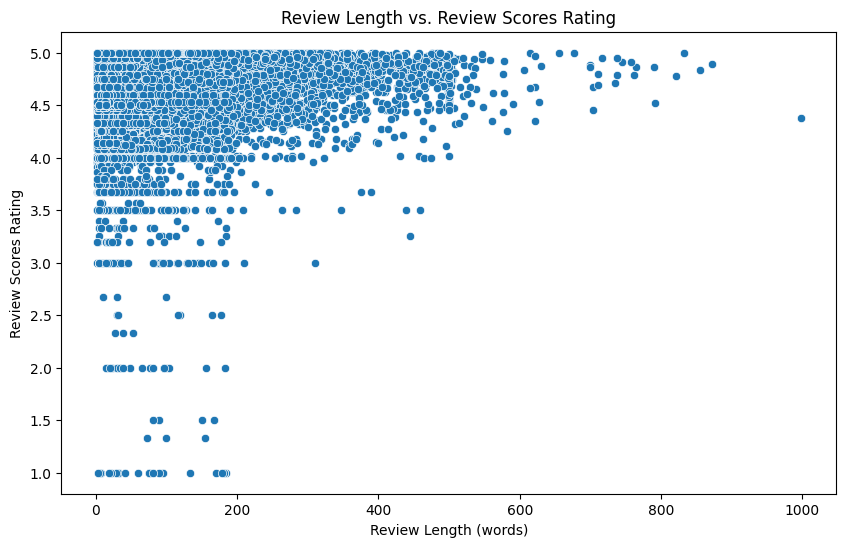

In [71]:
reviews_data = pd.read_csv("reviews.csv")

merged_data = pd.merge(reviews_data, data, left_on='listing_id', right_on='id')
merged_data['review_length'] = merged_data['comments'].apply(lambda x: len(str(x).split()))

correlation = merged_data['review_length'].corr(merged_data['review_scores_rating'])
print(f"Correlation between review length and review scores: {correlation}")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='review_length', y='review_scores_rating')
plt.title('Review Length vs. Review Scores Rating')
plt.xlabel('Review Length (words)')
plt.ylabel('Review Scores Rating')
plt.show()


In [73]:
keywords = ['clean', 'comfortable', 'noisy']
for keyword in keywords:
    merged_data[f'{keyword}_count'] = merged_data['comments'].apply(lambda x: str(x).lower().count(keyword))
print(merged_data.head())
for keyword in keywords:
    correlation = merged_data[f'{keyword}_count'].corr(merged_data['review_scores_rating'])
    print(f"Correlation between '{keyword}' count and review scores: {correlation}")

   listing_id   id_x        date  reviewer_id reviewer_name  \
0         958   5977  2009-07-23        15695      Edmund C   
1         958   6660  2009-08-03        26145         Simon   
2         958  11519  2009-09-27        25839         Denis   
3         958  16282  2009-11-05        33750          Anna   
4         958  26008  2010-02-13        15416     V Jillian   

                                            comments  id_y  \
0  Our experience was, without a doubt, a five st...   958   
1  Returning to San Francisco is a rejuvenating t...   958   
2  We were very pleased with the accommodations a...   958   
3  We highly recommend this accomodation and agre...   958   
4  Holly's place was great. It was exactly what I...   958   

                        listing_url       scrape_id last_scraped  ...  \
0  https://www.airbnb.com/rooms/958  20240904163718   2024-09-04  ...   
1  https://www.airbnb.com/rooms/958  20240904163718   2024-09-04  ...   
2  https://www.airbnb.com/roo